## Happiness Report #3

**map(), apply(), df.applymap(), pd.melt()**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

* Renaming columns

In [19]:
happiness2015 = happiness2015.rename(mapping, axis=1)
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


**Series methods, map() and apply()**

In [27]:
#function to be applied as parameter to Series.method()
def label(element):
    if element > 1:
        return "High"
    else:
        return "Low"

In [28]:
economy_impact_map = happiness2015["Economy"].map(label)
economy_impact_apply = happiness2015["Economy"].apply(label)

In [26]:
print(".map():\n",economy_impact_map.head(3))
print("\n.apply():\n",economy_impact_apply.head(3))

.map():
 0    High
1    High
2    High
Name: Economy, dtype: object

.apply():
 0    High
1    High
2    High
Name: Economy, dtype: object


In [30]:
#veryfing that both methods produce same result
Ha

True

**df.applymap()**
* Maps multiple columns - Dataframe

In [33]:
#columnns to be mapped
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
#Applying df.applymap()
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head(3)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low


**df.apply() with series function, value_counts()**

In [34]:
#Function that takes columns and returns percentage
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

In [37]:
#Applying Series function into .apply method()
v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


**factors as percentages to Happiness Score: .apply()**

In [39]:
#columnns whose percentages sum equal Happiness Score
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [42]:
#Function returns percentage (per column) relative to Happiness Score
def percentages(col):
    div = col / happiness2015["Happiness Score"]
    return div*100
#Applying function into method
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head(3)

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011


**pd.melt()**

In [44]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [47]:
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars=factors)
#Percentage column accounts for the percentage value of "variable column" relative to "Happiness Score"
melt["Percentage"] = round(melt["value"]/melt["Happiness Score"] * 100, 2)
melt.head(3)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61


Pivot table:
                       value
variable                   
Dystopia Residual  2.098977
Economy            0.846137
Family             0.991046
Freedom            0.428615
Generosity         0.237296
Health             0.630259
Trust              0.143422


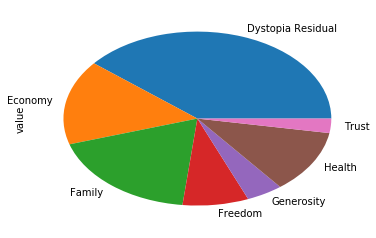

In [53]:
#pivot table with mean values of each variable
pv_melt = melt.pivot_table(index = "variable", values ="value")
print("Pivot table:\n",pv_melt)
pv_melt.plot(kind="pie", y="value", legend=False)

* Appart from Dystopia Residual, the other most influencial factors in Happiness score are Economy, Family, and Health.